In [9]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
from functools import partial

from data import get_data
from models import SIR, SIR_jac_x, obs, obs_jac_x

In [11]:
import numpy as np
from scipy.integrate import odeint


def deriv(A, t, Ab):
    return np.dot(Ab, A)


Ab = np.array([[-0.25,    0,    0],
               [ 0.25, -0.2,    0],
               [    0,  0.2, -0.1]])

A0 = np.array([10, 20, 30])

MA = odeint(deriv, A0, time, args=(Ab,))

In [15]:
np.dot(Ab, A0)

array([-2.5, -1.5,  1. ])

In [29]:
cases, N = get_data()
N = N.numpy()
cases = cases.numpy()
I0 = np.array([1.])
R0 = np.array([0.])
S0 = N - I0 - R0

In [30]:
f = KalmanFilter(dim_x=3, dim_z=1)

In [31]:
f.x = np.array([S0, I0, R0])
f.F = np.array([[1., 0, 0],
                [0, 1., 0],
                [0, 0, 1.]])
f.H = np.array([[0, 0.1, 0]])
f.P = np.array([[0.1, 0, 0],
                [0, 0.1, 0],
                [0, 0, 0.1]])

f.R = np.array([[1.]])
f.Q = np.array([[1., 0, 0],
                [0, 1., 0],
                [0, 0, 1.]])

In [32]:
Q = Q_discrete_white_noise(dim=3, dt=0.1, var=1.0)
Q

array([[2.5e-05, 5.0e-04, 5.0e-03],
       [5.0e-04, 1.0e-02, 1.0e-01],
       [5.0e-03, 1.0e-01, 1.0e+00]])

In [33]:
cov = []
for z in cases:
    f.predict()
    f.update(z)
    cov.append(f.S)

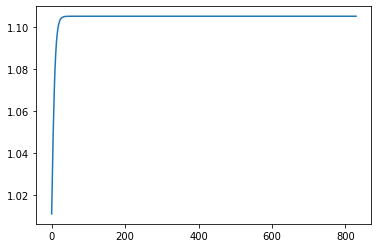

In [35]:
plt.plot(np.array(cov).flatten())